# Import modules

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Import  key stroke data

In [2]:
directory = r'C:\Users\jbuck.ad\Documents\WIP\python\RSI\data storage'

In [3]:
def convert_data(directory,file):
    df = pd.read_csv(os.path.join(directory,file))
    df['date'] = pd.to_datetime(df['date']+','+df['time'],format='%Y-%m-%d,%H:%M')
    df.drop(columns=['Unnamed: 0','time'],inplace=True)
    df = df.set_index('date')
    return df

In [4]:
def create_df(directory):
    df_all=pd.DataFrame()
    for file in os.listdir(directory):
        try:
            if file.split('.')[-1] == 'csv':
                #print(file)
                df_all = pd.concat([df_all,convert_data(directory,file)])
        except: pass
    return df_all

In [5]:
# def preprocess(df,upper=None):
#     if upper != None: df['frequency'] = df['frequency'].clip(upper=upper)
#     df = df.groupby('date').sum().reset_index().rename(columns={'frequency':'keys_sum'})
#     df['date'] = pd.to_datetime(df['date'])
#     rng = pd.DataFrame(pd.date_range(df['date'].min(),df['date'].max())).rename(columns={0:'date'})
#     df = df.merge(rng,on='date',how='right')
#     df['keys_sum'] = df['keys_sum'].fillna(0)
#     df['day'] = df['date'].dt.day_name()
#     df['week'] = df['date'].dt.week
#     df['month'] = df['date'].dt.month
#     df['year']= df['date'].dt.year #NEW
#     return df

In [6]:
# def preprocess(df,upper=None,freq='date'):
#     df = df.copy()
#     if upper != None: df['frequency'] = df['frequency'].clip(upper=upper)
    
#     df['date'] = pd.to_datetime(df['date'])
#     df['day'] = df['date'].dt.day_name()
#     df['week'] = df['date'].dt.isocalendar().week
#     df['month'] = df['date'].dt.month
#     df['year']= df['date'].dt.year
    
#     df['keys_sum'] = df.groupby('month')['frequency'].sum()
#     df = df.reset_index(drop=True)#.rename(columns={'frequency':'keys_sum'})
    
# #     df = df.groupby(freq).sum().reset_index().rename(columns={'frequency':'keys_sum'})
    
# #     rng = pd.DataFrame(pd.date_range(df['date'].min(),df['date'].max())).rename(columns={0:'date'})
# #     df = df.merge(rng,on='date',how='right')
# #     df['keys_sum'] = df['keys_sum'].fillna(0)

#     return df

In [7]:
df = create_df(directory)

In [8]:
df = df.rename(columns={'frequency':'ksr'}) # ksr = key stroke rate

In [9]:
df = df[df>0].dropna()

# Describe data

In [10]:
meta_dict = {
'Number of files':len(os.listdir(directory)),
'Number of days':len(set(df.index.date)),
'Number of records':df.shape[0]}

In [11]:
for k, v in meta_dict.items():
    print(k+':',v)

Number of files: 706
Number of days: 360
Number of records: 933223


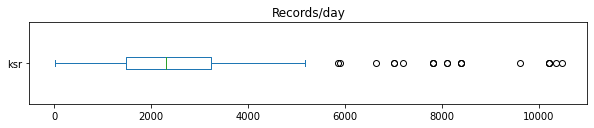

In [12]:
a = df.groupby(df.index.date).count().plot.box(vert=False,figsize=(10,1.5),title='Records/day')

# Explore sample of days

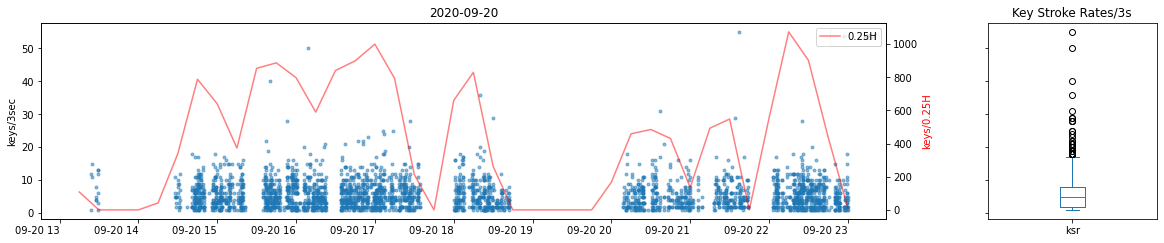

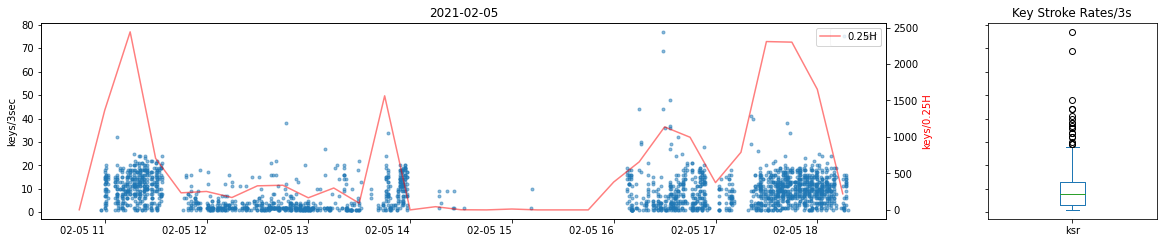

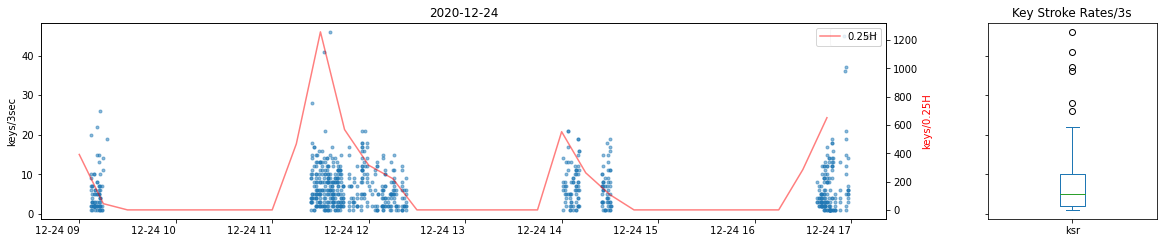

In [25]:
n_samples = 3
freq = '0.25H'

samples = [s.strftime('%Y-%m-%d') for s in df.sample(n_samples).index]
for s in samples:
    dfd = df.loc[s]
    fig,ax=plt.subplots(1,2,figsize=(20,4),gridspec_kw={'width_ratios': [5,1]},sharey=True)
    
    # graph 1
    dfd.plot(style='.',alpha=0.5,label='Per 3sec',title=s,ax=ax[0])
    ax[0].set_ylabel('keys/3sec')    
    dfdh = dfd.resample(freq).sum()
    ax2 = ax[0].twinx()
    ax2.plot(dfdh,alpha=0.5,color='red',label=freq)
    ax2.set_ylabel('keys/'+freq,color='red')
    ax[0].set_xlabel('')
    ax[0].tick_params(labelrotation=0,)
    a = plt.legend()
    
    # graph 2
    dfd.plot.box(title='Key Stroke Rates/3s',ax=ax[1])

- Remember we have 360 of these graphs to work with

- show an overlay of all means

In [390]:
def resample_days(s,freq):
    s = s.resample(freq).sum()
    s.index = s.index.strftime('%H:%M')
    return s

In [386]:
all_days_1H = df.groupby(df.index.date).apply(resample_days,'5min').unstack(level=0)

In [445]:
# xmin = [n for n,t in enumerate(ax.get_xticklabels()) if t.get_text()=='09:00'][0]
# xmax = [n for n,t in enumerate(ax.get_xticklabels()) if t.get_text()=='17:00'][0]

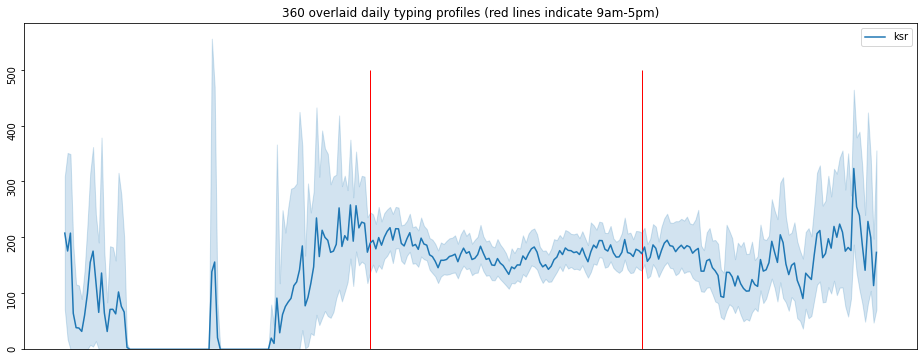

In [447]:
fig,ax = plt.subplots(figsize=(16,6))
sns.lineplot(data=all_days_1H,ci=99)
ax.tick_params(rotation=90)
ax.set_ylim(0)
ax.xaxis.set_visible(False)

ax.vlines(x=108,ymin=0,ymax=500,color='r',linewidth=1)
ax.vlines(x=204,ymin=0,ymax=500,color='r',linewidth=1)

a = ax.set_title('360 overlaid daily typing profiles (red lines indicate 9am-5pm)')

# Import hand pain data

In [78]:
dfh = pd.read_csv('pain_data_hand.csv',index_col=0)

In [79]:
dfh.head()

,Day,Date,Time,Side,y location,x location,Pain type,Pain level,arm,Pain score,Key,nerve
0,Tuesday,2020-05-13,10:00:00,F,BA,1,P,L,R,2.0,F1BA,Ulnar
1,Tuesday,2020-05-13,10:00:00,F,BA,2,P,L,R,2.0,F2BA,Ulnar
2,Tuesday,2020-05-13,10:00:00,F,BA,3,P,L,R,2.0,F3BA,Median
3,Tuesday,2020-05-13,11:20:00,F,BA,2,P,L,R,2.0,F2BA,Ulnar
4,Tuesday,2020-05-13,11:20:00,F,BA,3,P,L,R,2.0,F3BA,Median


In [80]:
dfh = dfh.set_index(pd.to_datetime(dfh['Date']+' '+dfh['Time'],format='%Y-%m-%d %H:%M:%S'))
dfh = dfh.drop(columns=['Date','Time','Key','Day'])

In [81]:
dfh.head()

,Side,y location,x location,Pain type,Pain level,arm,Pain score,nerve
2020-05-13 10:00:00,F,BA,1,P,L,R,2.0,Ulnar
2020-05-13 10:00:00,F,BA,2,P,L,R,2.0,Ulnar
2020-05-13 10:00:00,F,BA,3,P,L,R,2.0,Median
2020-05-13 11:20:00,F,BA,2,P,L,R,2.0,Ulnar
2020-05-13 11:20:00,F,BA,3,P,L,R,2.0,Median


In [96]:
dfh.index.astype(str).str.split(':',expand=True).to_frame()[[1,2]].value_counts()

1   2 
00  00    863
30  00    273
45  00     97
15  00     56
20  00     29
50  00     24
10  00     21
40  00     13
35  00     10
25  00      6
55  00      1
dtype: int64

In [105]:
print(dfh.index.min().date(),':',dfh.index.max().date())

2020-05-13 : 2021-10-01


In [106]:
print(df.index.min().date(),':',df.index.max().date())

2020-05-01 : 2021-10-03


# Combine data

## Resample

- First we resample at the lowest frequency (15min) to all combining the data sets

### pain data

In [194]:
dfh.index = dfh.index.round('15min')
dfh15 = dfh.copy()

In [196]:
dfh15.head()

,Side,y location,x location,Pain type,Pain level,arm,Pain score,nerve
2020-05-13 10:00:00,F,BA,1,P,L,R,2.0,Ulnar
2020-05-13 10:00:00,F,BA,2,P,L,R,2.0,Ulnar
2020-05-13 10:00:00,F,BA,3,P,L,R,2.0,Median
2020-05-13 11:15:00,F,BA,2,P,L,R,2.0,Ulnar
2020-05-13 11:15:00,F,BA,3,P,L,R,2.0,Median


In [197]:
dfh15.shape

(1393, 8)

### ksr data

In [204]:
df.index.name = None
df15 = df.resample('15min')[['ksr']].sum()
df15.head(5)

,ksr
2020-05-01 11:30:00,342.0
2020-05-01 11:45:00,882.0
2020-05-01 12:00:00,21.0
2020-05-01 12:15:00,41.0
2020-05-01 12:30:00,175.0


In [205]:
df15.shape

(49881, 1)

## Binarize target

- Set any pain to 1, no pain to 0 (start with a simple binary classifier)

In [207]:
dfh15b = dfh15.copy()
dfh15b['pain'] = 1

In [208]:
dfh15b.head()

,Side,y location,x location,Pain type,Pain level,arm,Pain score,nerve,pain
2020-05-13 10:00:00,F,BA,1,P,L,R,2.0,Ulnar,1
2020-05-13 10:00:00,F,BA,2,P,L,R,2.0,Ulnar,1
2020-05-13 10:00:00,F,BA,3,P,L,R,2.0,Median,1
2020-05-13 11:15:00,F,BA,2,P,L,R,2.0,Ulnar,1
2020-05-13 11:15:00,F,BA,3,P,L,R,2.0,Median,1


In [210]:
dfh15b.shape

(1393, 9)

## Merge

In [216]:
dfc = df15.merge(dfh15b, left_index=True,right_index=True,how='outer')

In [219]:
dfc['pain'] = dfc['pain'].fillna(0)
dfc = dfc[['ksr','pain']]

In [220]:
dfc.head()

,ksr,pain
2020-05-01 11:30:00,342.0,0.0
2020-05-01 11:45:00,882.0,0.0
2020-05-01 12:00:00,21.0,0.0
2020-05-01 12:15:00,41.0,0.0
2020-05-01 12:30:00,175.0,0.0


In [221]:
dfc.shape

(50771, 2)

In [222]:
dfc['pain'].value_counts(normalize=True)

0.0    0.972563
1.0    0.027437
Name: pain, dtype: float64

# Resample vs. class balance

- now that we have a dataset combining the ksr and pain data, we can view the impact resampling has on the class imbalance.

In [322]:
res = {}
for freq in ['15min','30min','1h','3h','6h','12h','24h']:
    dfcfreq = dfc.resample(freq).sum()
    dfcfreq.loc[dfcfreq['pain']>0]=1
    vc = dfcfreq['pain'].value_counts(normalize=True)
    size = pd.Series(dfcfreq.shape[0],[2])
    vc = vc.append(size)
    res[freq] = vc

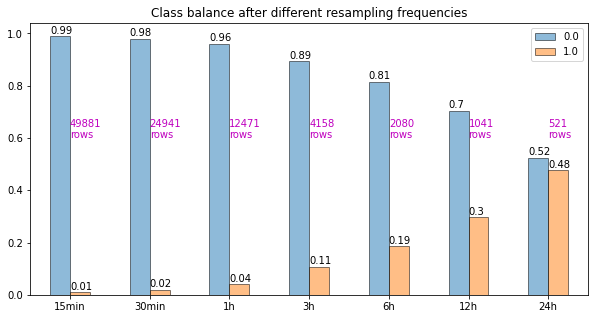

In [323]:
fig,ax=plt.subplots(figsize=(10,5))
df_res = pd.DataFrame(res).T
df_res[[0,1]].plot.bar(ax=ax,alpha=0.5,ec='k')
ax.tick_params(rotation=0)
for p in ax.patches:
    x = p.get_x()
    y = p.get_height()
    ax.text(x,y+0.01,s=round(y,2))
[ax.text(x,0.6,str(int(s))+'\nrows',color='m') for x,s in enumerate(df_res[2].values)]
a = ax.set_title('Class balance after different resampling frequencies')

In [327]:
dfc12h = dfc.resample('12h').sum()
dfc12h.loc[dfc12h['pain']>0]=1

In [328]:
dfc12h['pain'].value_counts(normalize=True)

0.0    0.704131
1.0    0.295869
Name: pain, dtype: float64

In [329]:
dfc12h.shape

(1041, 2)

In [332]:
dfc12h.head()

,ksr,pain
2020-05-01 00:00:00,1224.0,0.0
2020-05-01 12:00:00,26194.0,0.0
2020-05-02 00:00:00,0.0,0.0
2020-05-02 12:00:00,0.0,0.0
2020-05-03 00:00:00,0.0,0.0


# Stationarity

Is the data stationary?
- Constant mean?
- Constant variance?

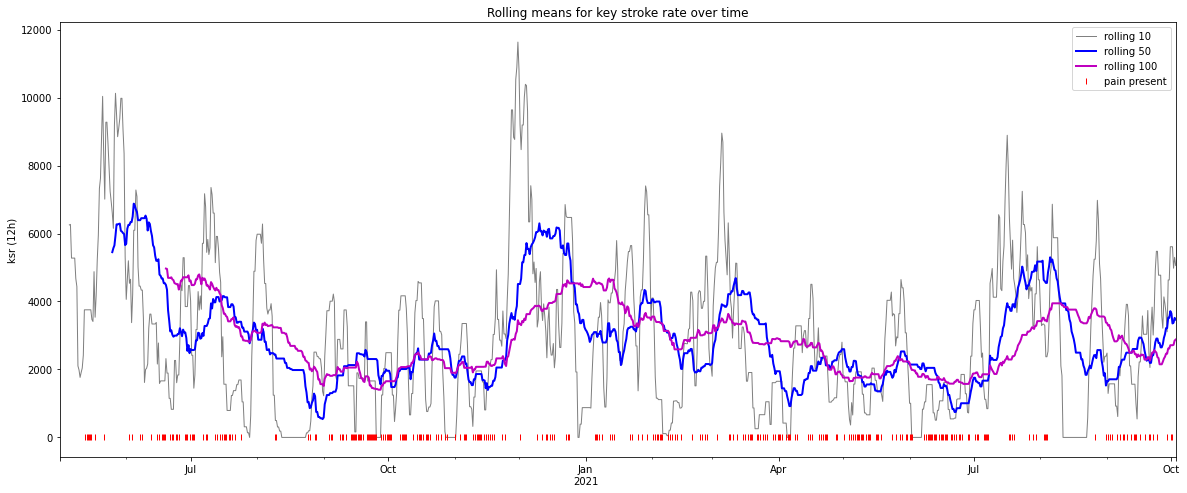

In [529]:
fig,ax=plt.subplots(figsize=(20,8))
dfc12h.rolling(10).mean()['ksr'].plot(linewidth=1,color='grey',label='rolling 10')
dfc12h.rolling(50).mean()['ksr'].plot(linewidth=2,color='blue',label='rolling 50')
dfc12h.rolling(100).mean()['ksr'].plot(linewidth=2,color='m',label='rolling 100')
ax.set_ylabel('ksr (12h)')
dfc12h.query('pain>0')['pain'].plot(style='|',color='red',label='pain present')
ax.legend()
a = ax.set_title('Rolling means for key stroke rate over time')

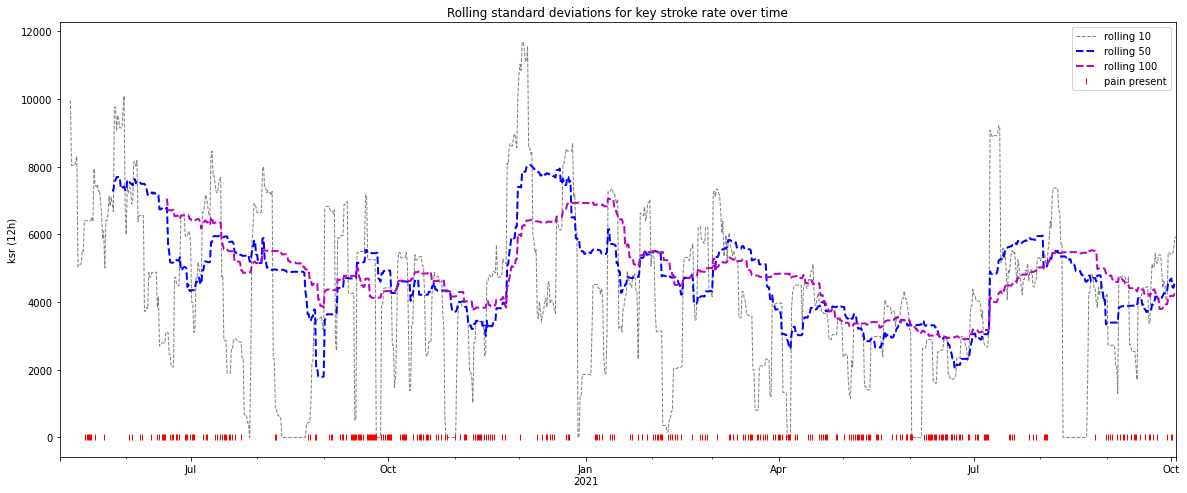

In [536]:
fig,ax=plt.subplots(figsize=(20,8))
dfc12h.rolling(10).std()['ksr'].plot(linewidth=1,color='grey',label='rolling 10',linestyle='--')
dfc12h.rolling(50).std()['ksr'].plot(linewidth=2,color='blue',label='rolling 50',linestyle='--')
dfc12h.rolling(100).std()['ksr'].plot(linewidth=2,color='m',label='rolling 100',linestyle='--')
ax.set_ylabel('ksr (12h)')
dfc12h.query('pain>0')['pain'].plot(style='|',color='red',label='pain present')
ax.legend()
a = ax.set_title('Rolling standard deviations for key stroke rate over time')

# Components of time series

Components of time series
- Seasonality
- Trend
- Cyclic
- Noise

In [537]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [546]:
res = seasonal_decompose(dfc12h['ksr'], model='additive')

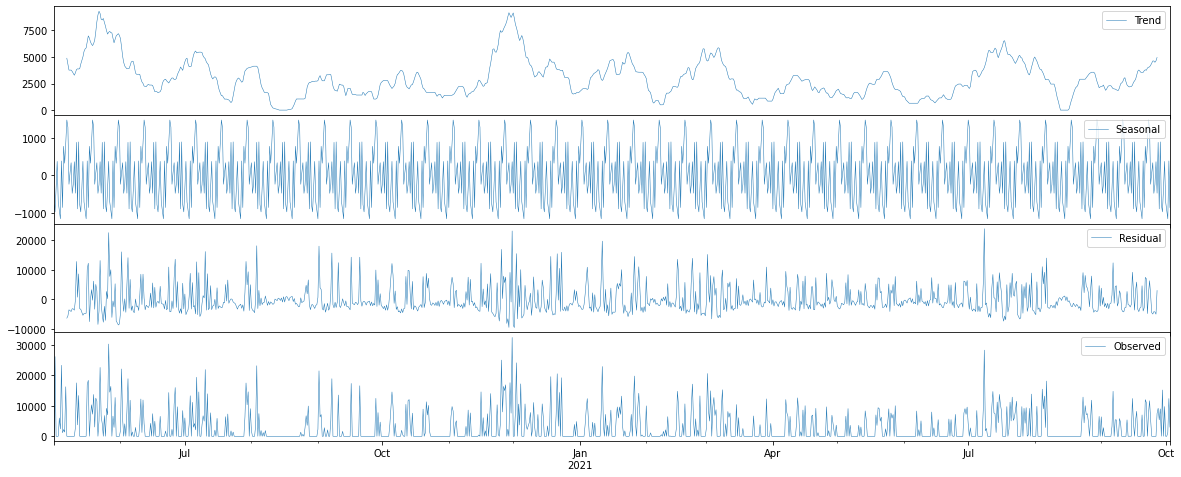

In [567]:
fig, ax = plt.subplots(4,1,figsize=(20,8),sharex=True)
res.trend.plot(ax=ax[0],linewidth=0.5,label='Trend',legend=True)
res.seasonal.plot(ax=ax[1],linewidth=0.5,label='Seasonal',legend=True)
res.resid.plot(ax=ax[2],linewidth=0.5,label='Residual',legend=True)
res.observed.plot(ax=ax[3],linewidth=0.5,label='Observed',legend=True)
plt.subplots_adjust(wspace=0, hspace=0)